For solving path dependencies

In [3]:
import sys
import os

current_dir = %pwd

# Detect the parent directory dynamically
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

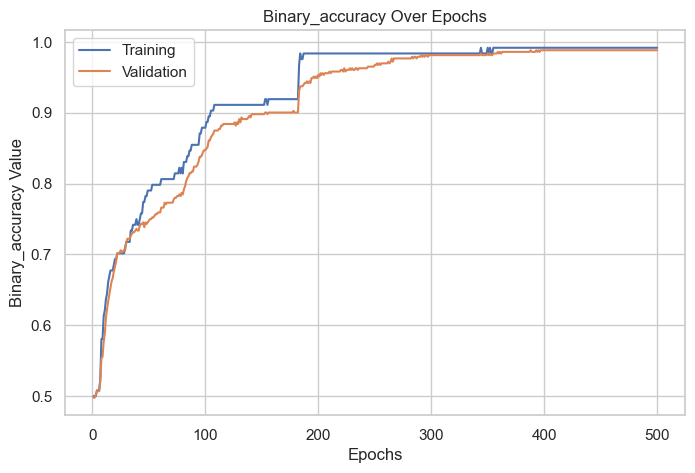

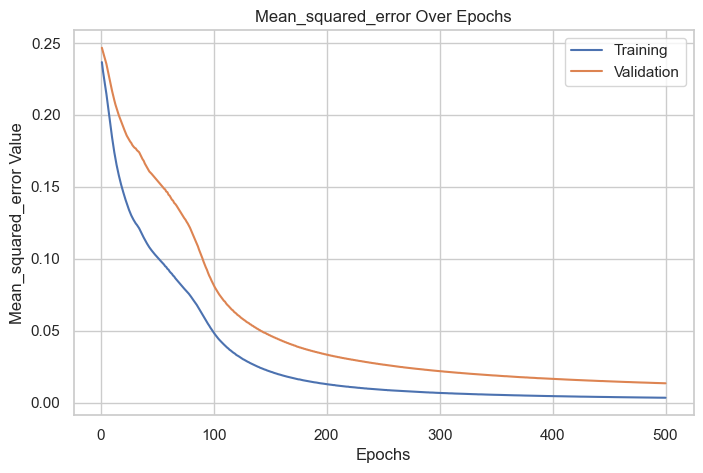

In [5]:

from src.main.dataset_handler import get_monk
from src.main.models.layers.dense import Dense
from src.main.models.model import Model
from src.main.optimizer import SGD
from src.main.regularizer import L2
from src.main.utils import plot_history
from src.main.utils import compute_metrics, log_experiment, setup_experiment


x_train, y_train, x_test, y_test = get_monk(1)

model = Model()
model.add(Dense(17, 4, activation="relu", weight_initializer="glorot_uniform", bias_initializer="zeros"))
model.add(Dense(4, 1, activation="sigmoid", weight_initializer="glorot_uniform", bias_initializer="zeros"))

optimizer = SGD(learning_rate=0.1, momentum=0.5)
l2 = L2(0)

model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["binary_accuracy"])

_, history = model.fit(x_train, y_train, x_test, y_test, epochs=500, batch_size=8, verbose=False)

x = {"mean_squared_error":0,"binary_accuracy":0}

log_experiment(setup_experiment("ex1"),model, {"mean_squared_error":0,"binary_accuracy":0}, x, x, x, x, x, history)




In [6]:
from src.main.dataset_handler import get_monk
from src.main.evaluation.kfold_cross_validation import Kfold_CV
from src.main.models.layers.dense import Dense
from src.main.models.model import Model
from src.main.optimizer import SGD
from src.main.regularizer import L2
from src.main.utils import plot_history

x_train, y_train, x_test, y_test = get_monk(1)

model = Model()
model.add(Dense(17, 4, activation="relu", weight_initializer="fan_in", bias_initializer="zeros"))
model.add(Dense(4, 1, activation="sigmoid", weight_initializer="fan_in", bias_initializer="zeros"))

optimizer = SGD(learning_rate=0.5, momentum=0.3)
l2 = L2(0.2)

model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["binary_accuracy"])

(train_score, val_score), model, histories = Kfold_CV(x_train, y_train, model, 5, 1000, 16, False)
    
for i, history in enumerate(histories):
    print("---History of fold: ", i+1)
    plot_history(history)

print("------ Train scores: ------ ")
print(train_score[0], train_score[1])
print("------ Validation scores: ------ ")
print(val_score[0], val_score[1])
print("------ Test scores: ------ ")
print(model.evaluate(x_test, y_test))


---History of fold:  1


TypeError: plot_history() missing 1 required positional argument: 'exp_dir'